In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"

  # IPython 7.14 deprecated set_matplotlib_formats from IPython
  try:
    from matplotlib_inline.backend_inline import set_matplotlib_formats
  except ImportError:
    # Fall back to deprecated location for older IPython versions
    from IPython.display import set_matplotlib_formats
    
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L2hvbWUvbWlrZW5ndXllbi9wcm9qZWN0L3RpZHlmaW5hbmNl'
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

{"/opt/anaconda3/lib/python3.13/importlib/_bootstrap.py": 1749745530.584952, "/opt/anaconda3/lib/python3.13/importlib/_bootstrap_external.py": 1749745530.5809522, "/opt/anaconda3/lib/python3.13/zipimport.py": 1749745530.2849557, "/opt/anaconda3/lib/python3.13/codecs.py": 1749745530.164957, "/opt/anaconda3/lib/python3.13/encodings/aliases.py": 1749745530.3809545, "/opt/anaconda3/lib/python3.13/encodings/__init__.py": 1749745530.428954, "/opt/anaconda3/lib/python3.13/encodings/utf_8.py": 1749745530.4809532, "/opt/anaconda3/lib/python3.13/abc.py": 1749745530.1569571, "/opt/anaconda3/lib/python3.13/io.py": 1749745530.2049568, "/opt/anaconda3/lib/python3.13/stat.py": 1749745530.256956, "/opt/anaconda3/lib/python3.13/_collections_abc.py": 1749745530.168957, "/opt/anaconda3/lib/python3.13/genericpath.py": 1749745530.1929567, "/opt/anaconda3/lib/python3.13/posixpath.py": 1749745530.2289565, "/opt/anaconda3/lib/python3.13/os.py": 1749745530.2209566, "/opt/anaconda3/lib/python3.13/_sitebuiltins.

In [2]:
import pandas as pd
import numpy as np

from plotnine import *
from mizani.formatters import percent_format
from adjustText import adjust_text

In [3]:
# Placeholder for FPT balance sheet visualization
# In practice, this would display the actual PDF or cleaned data
# from DataCore's acquisition pipeline

# Example structure of what the balance sheet data looks like:
# Assets: Current assets (cash, receivables, inventory) + Non-current assets (PP&E, intangibles)
# Liabilities: Current liabilities (payables, short-term debt) + Non-current liabilities (long-term debt)
# Equity: Common stock + Retained earnings

In [4]:
# Placeholder for FPT income statement visualization
# Shows the progression from revenue through various profit measures to net income

In [5]:
# Placeholder for FPT cash flow statement visualization
# Reconciles net income with actual cash generation

In [6]:
import sqlite3

tidy_finance = sqlite3.connect(database="data/tidy_finance_python.sqlite")

comp_vn = pd.read_sql_query(
    sql="SELECT * FROM comp_vn",
    con=tidy_finance,
    parse_dates={"datadate"}
)

comp_vn.head(3)

,symbol,year,total_current_asset,ca_fin,ca_cce,ca_cash,ca_cash_inbank,ca_cash_attransit,ca_cash_equivalent,ca_fin_invest,...,xsga,xint,oancf,capx,be,op,at_lag,inv,total_debt,selling_general_and_administrative_expenses
0,AGF,1998,8.845141e+10,None,5.469709e+09,0.000000e+00,None,None,0.0,1.110705e+10,...,1.199765e+10,0.0,NaN,NaN,2.656020e+10,0.711195,NaN,NaN,0.000000e+00,1.990718e+10
1,BBC,1999,5.672574e+10,None,5.354939e+09,5.354939e+09,None,None,0.0,0.000000e+00,...,9.396468e+09,0.0,2.687635e+10,1.097031e+10,3.211410e+10,0.728193,NaN,NaN,1.505529e+09,2.387858e+10
2,AGF,1999,9.558392e+10,None,2.609276e+09,0.000000e+00,None,None,0.0,1.008298e+10,...,1.595913e+10,0.0,1.675607e+10,3.970966e+09,3.576596e+10,0.816972,1.068410e+11,0.090477,0.000000e+00,2.744458e+10


In [7]:
vn30_symbols = [
    "ACB", "BCM", "BID", "BVH", "CTG", "FPT", "GAS", "GVR", "HDB", "HPG",
    "MBB", "MSN", "MWG", "PLX", "POW", "SAB", "SHB", "SSB", "STB", "TCB",
    "TPB", "VCB", "VHM", "VIB", "VIC", "VJC", "VNM", "VPB", "VRE", "EIB"
]

comp_vn30 = comp_vn[comp_vn["symbol"].isin(vn30_symbols)]
comp_vn30.head(3)

,symbol,year,total_current_asset,ca_fin,ca_cce,ca_cash,ca_cash_inbank,ca_cash_attransit,ca_cash_equivalent,ca_fin_invest,...,xsga,xint,oancf,capx,be,op,at_lag,inv,total_debt,selling_general_and_administrative_expenses
11,FPT,2002,5.098910e+11,None,1.027470e+11,0.000000e+00,None,None,0.0,0.0,...,4.178100e+10,9.008000e+09,3.203600e+10,2.202800e+10,3.125400e+10,3.293018,NaN,NaN,0.0,1.235850e+11
17,VNM,2003,2.101406e+12,None,6.925924e+11,6.925924e+11,None,None,0.0,0.0,...,9.089413e+10,1.698909e+10,NaN,NaN,1.560789e+12,0.663257,NaN,NaN,0.0,5.037799e+11
21,FPT,2003,9.171390e+11,None,7.995600e+10,0.000000e+00,None,None,0.0,0.0,...,8.584800e+10,1.286700e+10,-2.905420e+11,3.753300e+10,1.697000e+11,0.940218,5.504080e+11,0.779104,0.0,1.968430e+11


In [8]:
balance_sheet_statements = (comp_vn30
    .assign(
        fiscal_year=lambda x: x["year"].astype(int),
        
        # Current Ratio: Current Assets / Current Liabilities
        current_ratio=lambda x: x["act"] / x["lct"],
        
        # Quick Ratio: (Current Assets - Inventory) / Current Liabilities
        quick_ratio=lambda x: (x["act"] - x["inv"]) / x["lct"],
        
        # Cash Ratio: Cash and Equivalents / Current Liabilities
        cash_ratio=lambda x: x["ca_cce"] / x["lct"],
        
        label=lambda x: np.where(
            x["symbol"].isin(vn30_symbols), x["symbol"], np.nan
        )
    )
)

balance_sheet_statements.head(3)

,symbol,year,total_current_asset,ca_fin,ca_cce,ca_cash,ca_cash_inbank,ca_cash_attransit,ca_cash_equivalent,ca_fin_invest,...,op,at_lag,inv,total_debt,selling_general_and_administrative_expenses,fiscal_year,current_ratio,quick_ratio,cash_ratio,label
11,FPT,2002,5.098910e+11,None,1.027470e+11,0.000000e+00,None,None,0.0,0.0,...,3.293018,NaN,NaN,0.0,1.235850e+11,2002,1.211413,NaN,0.244109,FPT
17,VNM,2003,2.101406e+12,None,6.925924e+11,6.925924e+11,None,None,0.0,0.0,...,0.663257,NaN,NaN,0.0,5.037799e+11,2003,2.195772,NaN,0.723694,VNM
21,FPT,2003,9.171390e+11,None,7.995600e+10,0.000000e+00,None,None,0.0,0.0,...,0.940218,5.504080e+11,0.779104,0.0,1.968430e+11,2003,1.274633,1.274633,0.111122,FPT


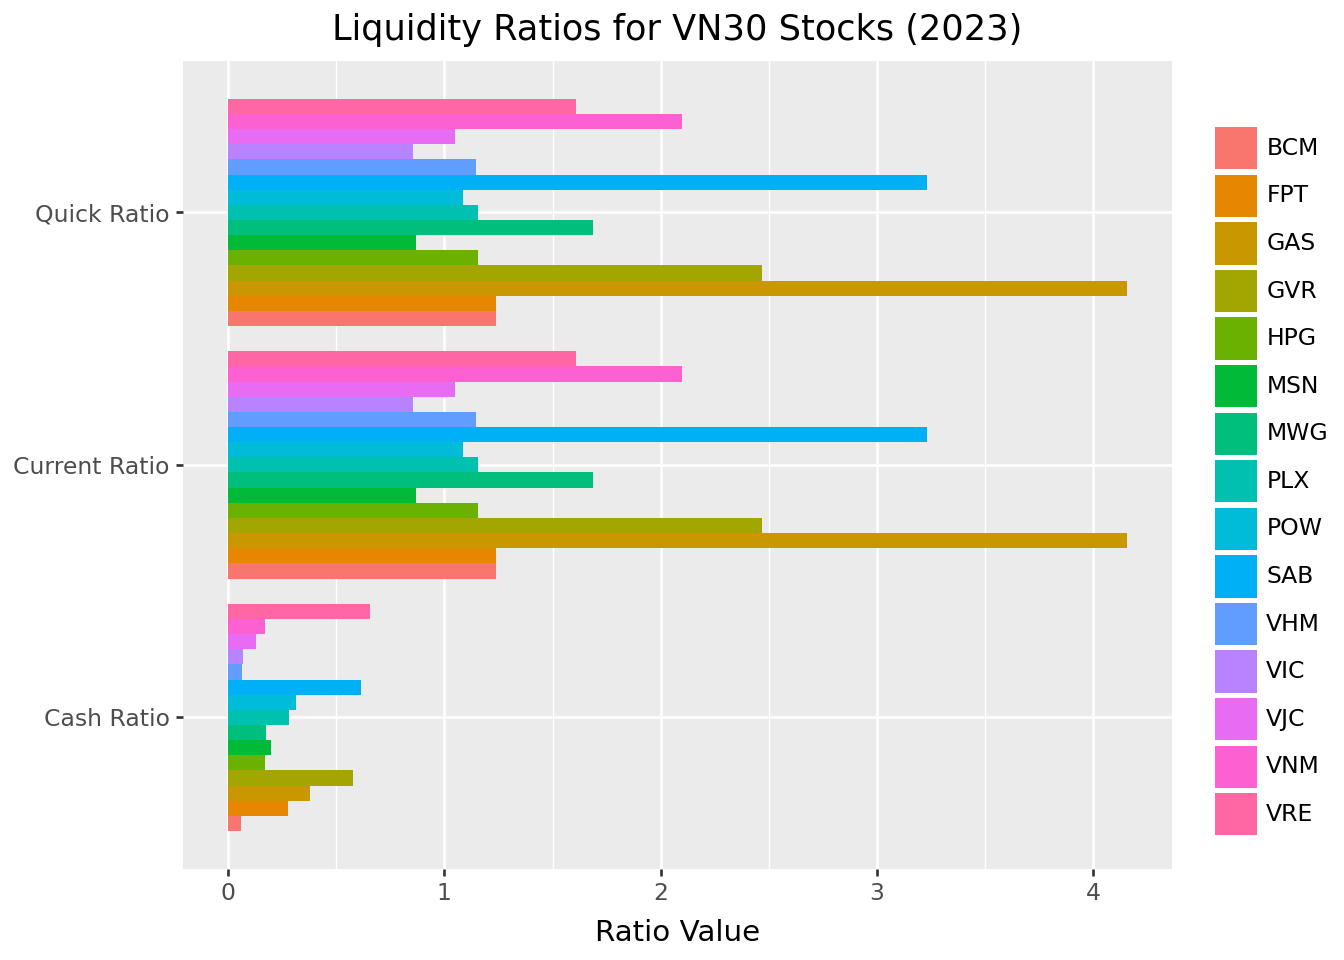

In [9]:
#| label: fig-409
#| fig-cap: Liquidity ratios measure a company's ability to meet short-term obligations. Higher values indicate greater liquidity, though excessively high ratios may suggest inefficient use of assets.
#| fig-alt: 'Title: Liquidity ratios for VN30 stocks. The figure shows a grouped bar chart comparing current, quick, and cash ratios across companies.'

liquidity_ratios = (balance_sheet_statements
    .query("year == 2023 & label.notna()")
    .get(["symbol", "current_ratio", "quick_ratio", "cash_ratio"])
    .melt(id_vars=["symbol"], var_name="name", value_name="value")
    .assign(
        name=lambda x: x["name"].str.replace("_", " ").str.title()
    )
)

liquidity_ratios_figure = (
    ggplot(liquidity_ratios, aes(y="value", x="name", fill="symbol"))
    + geom_col(position="dodge")
    + coord_flip()
    + labs(
        x="", y="Ratio Value", fill="",
        title="Liquidity Ratios for VN30 Stocks (2023)"
    )
)

liquidity_ratios_figure.show()

In [10]:
balance_sheet_statements = balance_sheet_statements.assign(
    debt_to_equity=lambda x: x["total_debt"] / x["total_equity"],
    debt_to_asset=lambda x: x["total_debt"] / x["at"]
)

income_statements = (comp_vn30
    .assign(
        year=lambda x: x["year"].astype(int),
        # Handle zero interest expense to avoid infinity
        interest_coverage=lambda x: np.where(
            x["cfo_interest_expense"] > 0,
            x["is_net_business_profit"] / x["cfo_interest_expense"],
            np.nan
        ),
        label=lambda x: np.where(
            x["symbol"].isin(vn30_symbols), x["symbol"], np.nan
        )
    )
)

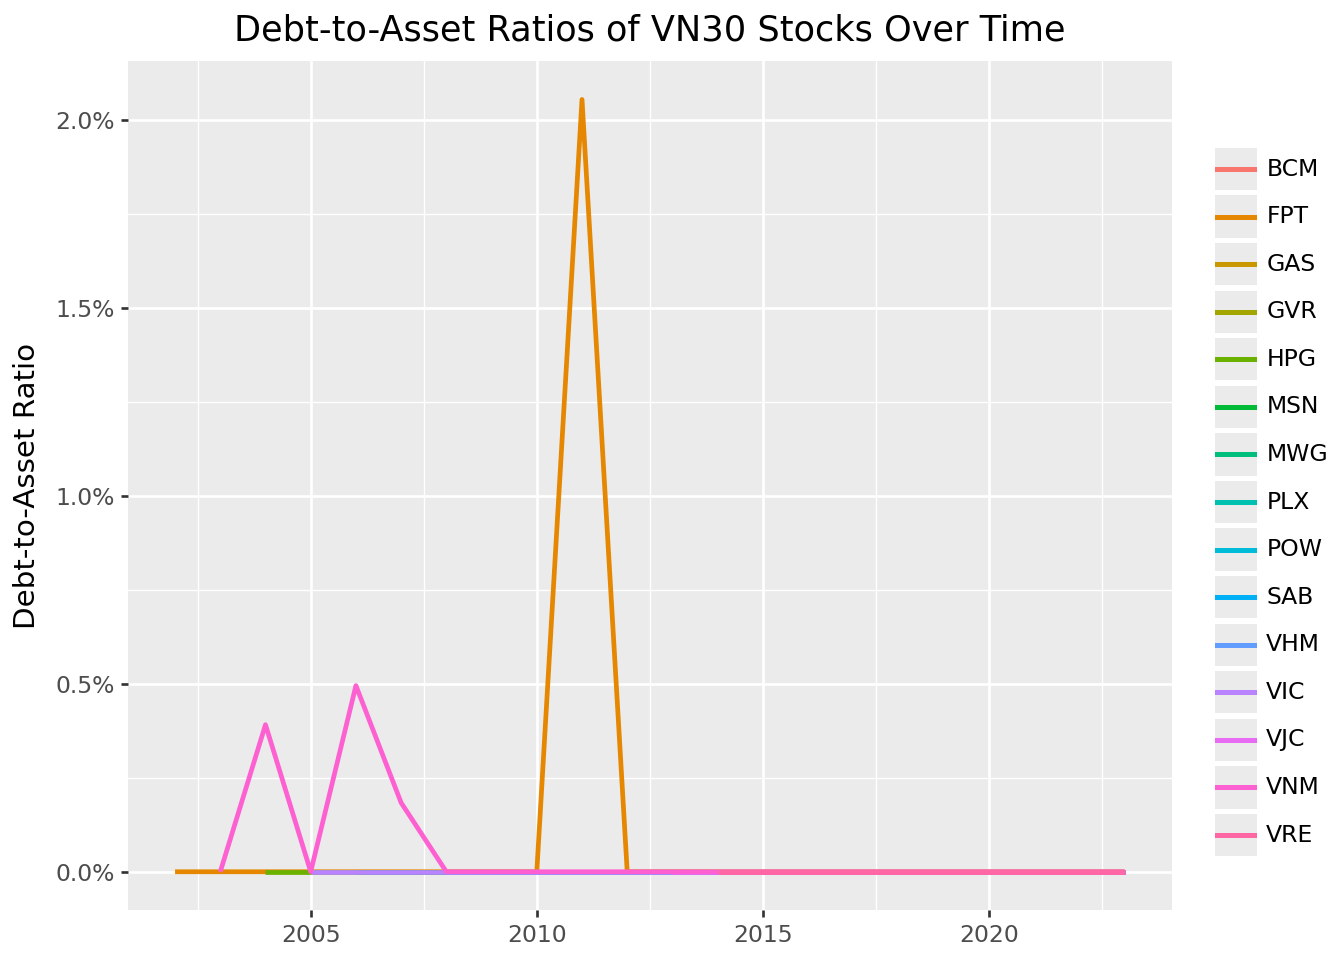

In [11]:
#| label: fig-410
#| fig-cap: Debt-to-asset ratios show the proportion of assets financed by debt. Changes over time reflect evolving capital structure strategies and market conditions.
#| fig-alt: 'Title: Debt-to-asset ratios of VN30 stocks over time. The figure shows a line chart with years on the horizontal axis and debt-to-asset ratios on the vertical axis.'

debt_to_asset = balance_sheet_statements.query("symbol in @vn30_symbols")

debt_to_asset_figure = (
    ggplot(debt_to_asset, aes(x="year", y="debt_to_asset", color="symbol"))
    + geom_line(size=1)
    + scale_y_continuous(labels=percent_format())
    + labs(
        x="", y="Debt-to-Asset Ratio", color="",
        title="Debt-to-Asset Ratios of VN30 Stocks Over Time"
    )
)

debt_to_asset_figure.show()

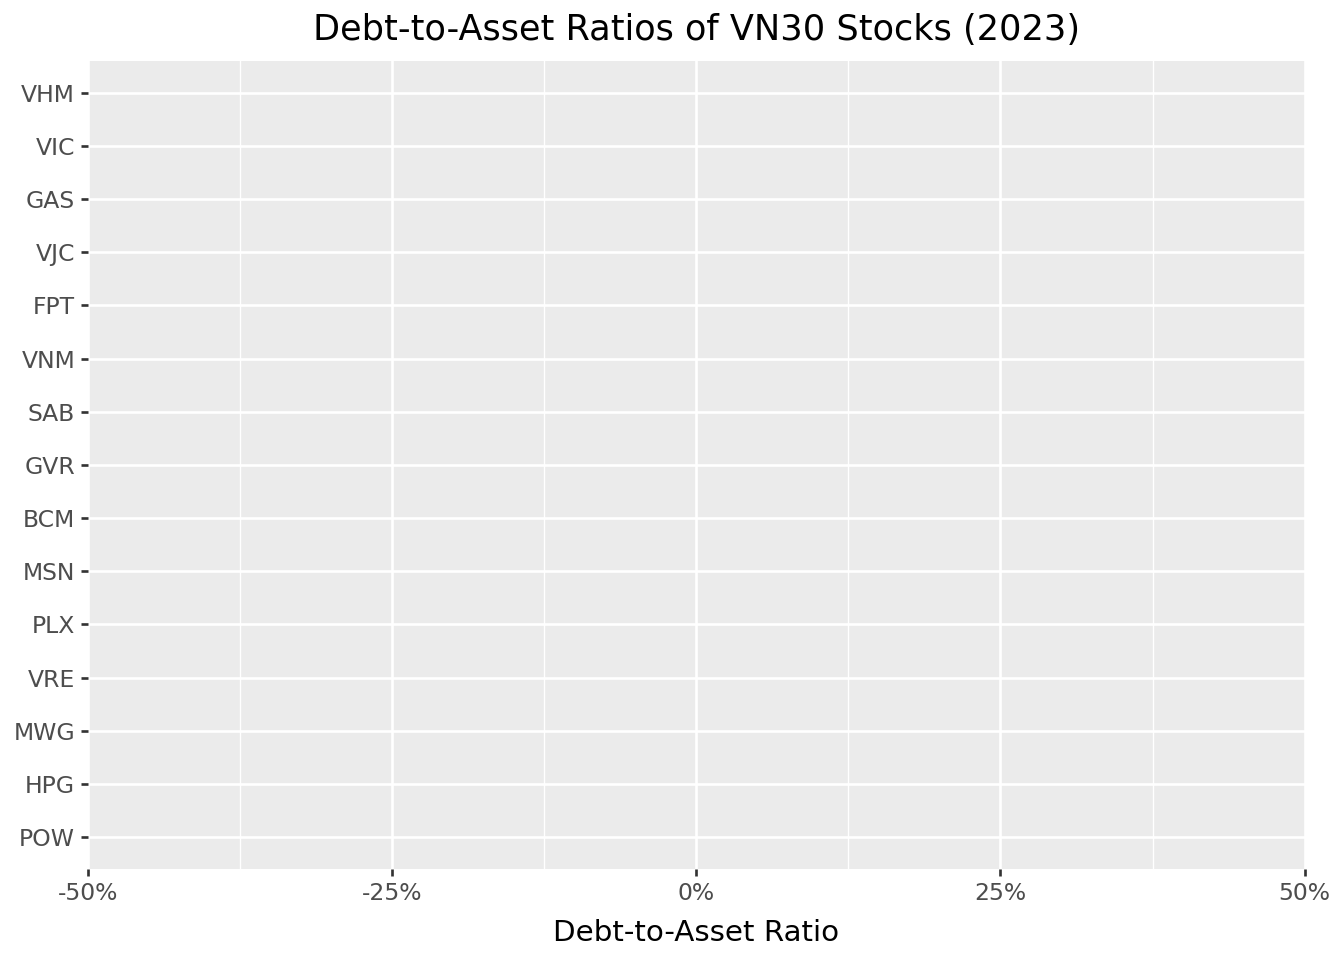

In [12]:
#| label: fig-411
#| fig-cap: Cross-sectional comparison of debt-to-asset ratios reveals industry patterns and company-specific financing strategies.
#| fig-alt: 'Title: Debt-to-asset ratios of VN30 stocks in 2023. The figure shows a horizontal bar chart with companies sorted by their debt-to-asset ratio.'

debt_to_asset_comparison = balance_sheet_statements.query("year == 2023")

debt_to_asset_comparison["symbol"] = pd.Categorical(
    debt_to_asset_comparison["symbol"],
    categories=debt_to_asset_comparison.sort_values("debt_to_asset")["symbol"],
    ordered=True
)

debt_to_asset_comparison_figure = (
    ggplot(
        debt_to_asset_comparison,
        aes(y="debt_to_asset", x="symbol", fill="label")
    )
    + geom_col()
    + coord_flip()
    + scale_y_continuous(labels=percent_format())
    + labs(
        x="", y="Debt-to-Asset Ratio", fill="",
        title="Debt-to-Asset Ratios of VN30 Stocks (2023)"
    )
    + theme(legend_position="none")
)

debt_to_asset_comparison_figure.show()

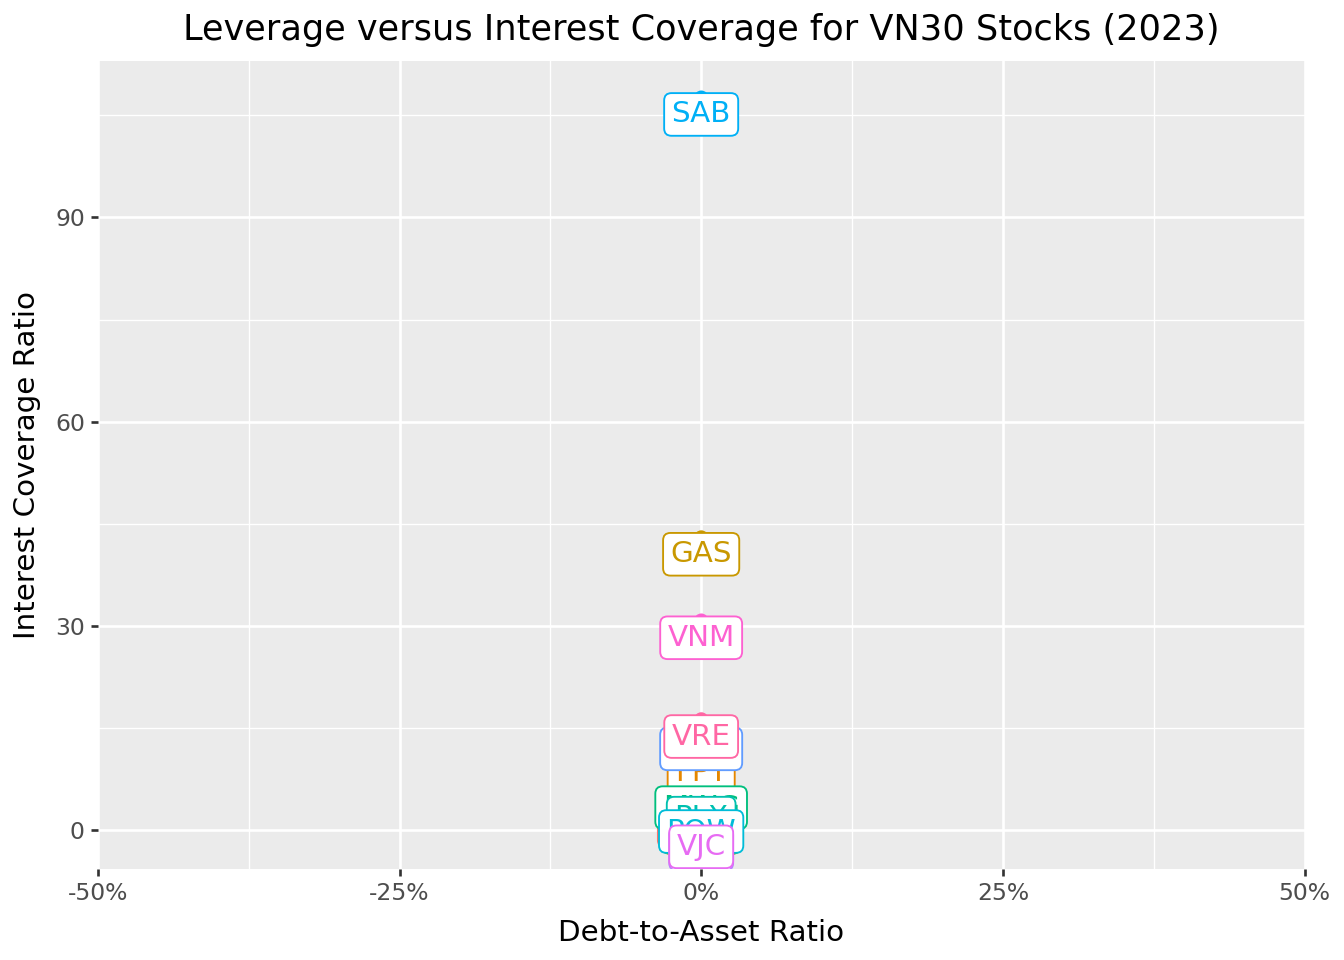

In [13]:
#| label: fig-412
#| fig-cap: The relationship between leverage and interest coverage reveals whether companies can comfortably service their debt. High leverage with low coverage indicates elevated financial risk.
#| fig-alt: 'Title: Debt-to-asset ratios versus interest coverage. The figure shows a scatter plot with debt-to-asset on the horizontal axis and interest coverage on the vertical axis.'

interest_coverage = (income_statements
    .query("year == 2023")
    .get(["symbol", "year", "interest_coverage"])
    .merge(balance_sheet_statements, on=["symbol", "year"], how="left")
)

interest_coverage_figure = (
    ggplot(
        interest_coverage,
        aes(x="debt_to_asset", y="interest_coverage", color="label")
    )
    + geom_point(size=2)
    + geom_label(
        aes(label="label"),
        adjust_text={"arrowprops": {"arrowstyle": "-"}}
    )
    + scale_x_continuous(labels=percent_format())
    + labs(
        x="Debt-to-Asset Ratio", y="Interest Coverage Ratio",
        title="Leverage versus Interest Coverage for VN30 Stocks (2023)"
    )
    + theme(legend_position="none")
)

interest_coverage_figure.show()

In [14]:
combined_statements = (balance_sheet_statements
    .get([
        "symbol", "year", "label", "current_ratio", "quick_ratio",
        "cash_ratio", "debt_to_equity", "debt_to_asset", "total_asset",
        "total_equity"
    ])
    .merge(
        (income_statements
            .get([
                "symbol", "year", "interest_coverage", "is_revenue",
                "is_cogs", "selling_general_and_administrative_expenses",
                "is_interest_expense", "is_gross_profit", "is_eat"
            ])
        ),
        on=["symbol", "year"],
        how="left"
    )
    .merge(
        (comp_vn30
            .assign(year=lambda x: x["year"].astype(int))
            .get(["symbol", "year", "ca_total_inventory", "ca_acc_receiv"])
        ),
        on=["symbol", "year"],
        how="left"
    )
)

combined_statements = combined_statements.assign(
    asset_turnover=lambda x: x["is_revenue"] / x["total_asset"],
    inventory_turnover=lambda x: x["is_cogs"] / x["ca_total_inventory"],
    receivables_turnover=lambda x: x["is_revenue"] / x["ca_acc_receiv"]
)

In [15]:
combined_statements = combined_statements.assign(
    gross_margin=lambda x: x["is_gross_profit"] / x["is_revenue"],
    profit_margin=lambda x: x["is_eat"] / x["is_revenue"],
    after_tax_roe=lambda x: x["is_eat"] / x["total_equity"]
)

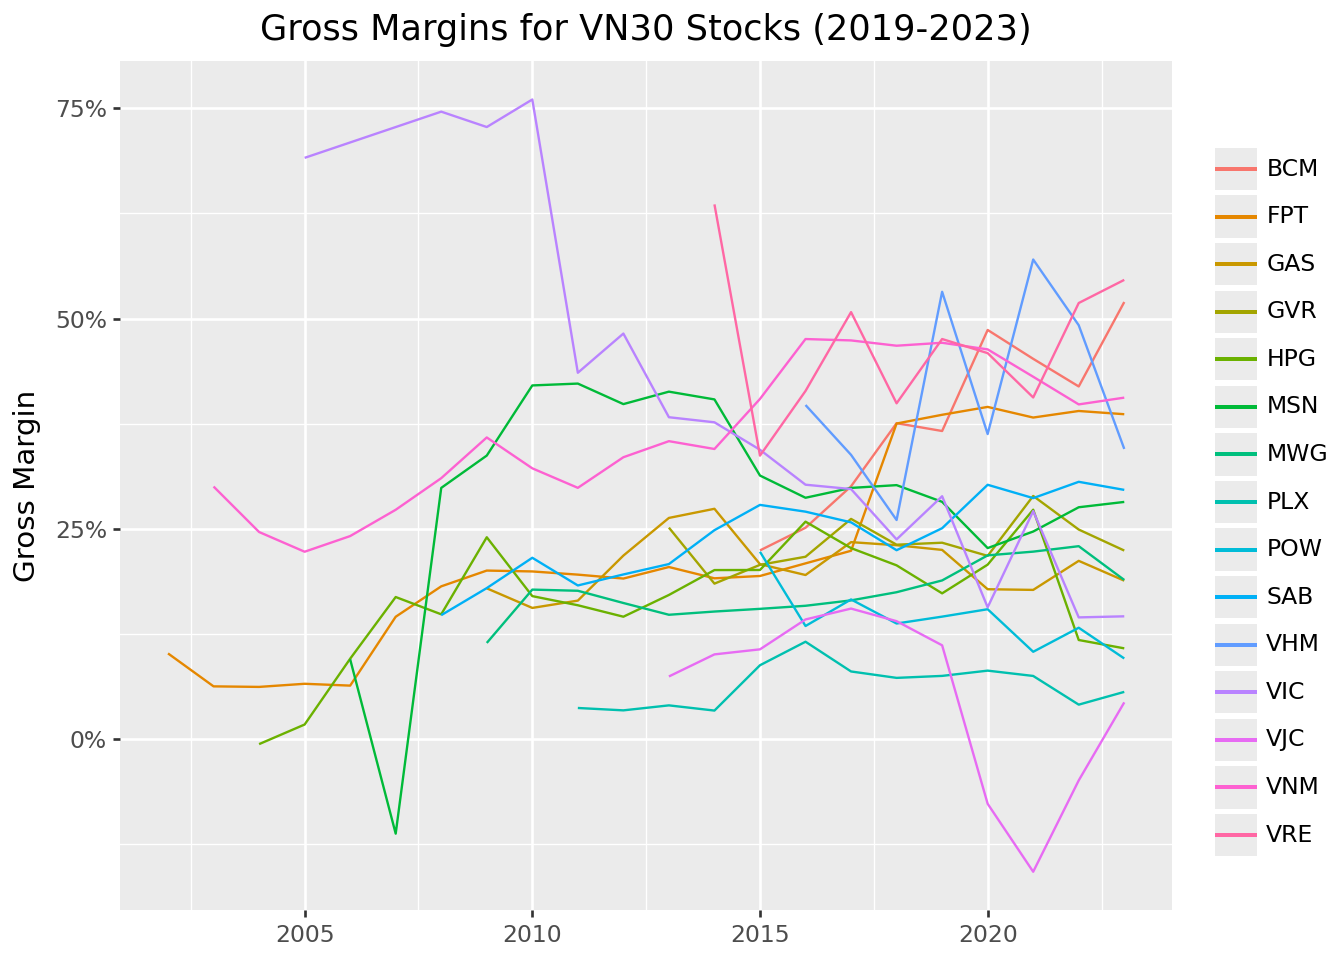

In [16]:
#| label: fig-413
#| fig-cap: Gross margin trends reveal changes in pricing power and production efficiency. Declining margins may signal increased competition or rising input costs.
#| fig-alt: 'Title: Gross margins for VN30 stocks over time. The figure shows a line chart with years on the horizontal axis and gross margins on the vertical axis.'

gross_margins = combined_statements.query("symbol in @vn30_symbols")

gross_margins_figure = (
    ggplot(gross_margins, aes(x="year", y="gross_margin", color="symbol"))
    + geom_line()
    + scale_y_continuous(labels=percent_format())
    + labs(
        x="", y="Gross Margin", color="",
        title="Gross Margins for VN30 Stocks (2019-2023)"
    )
)

gross_margins_figure.show()

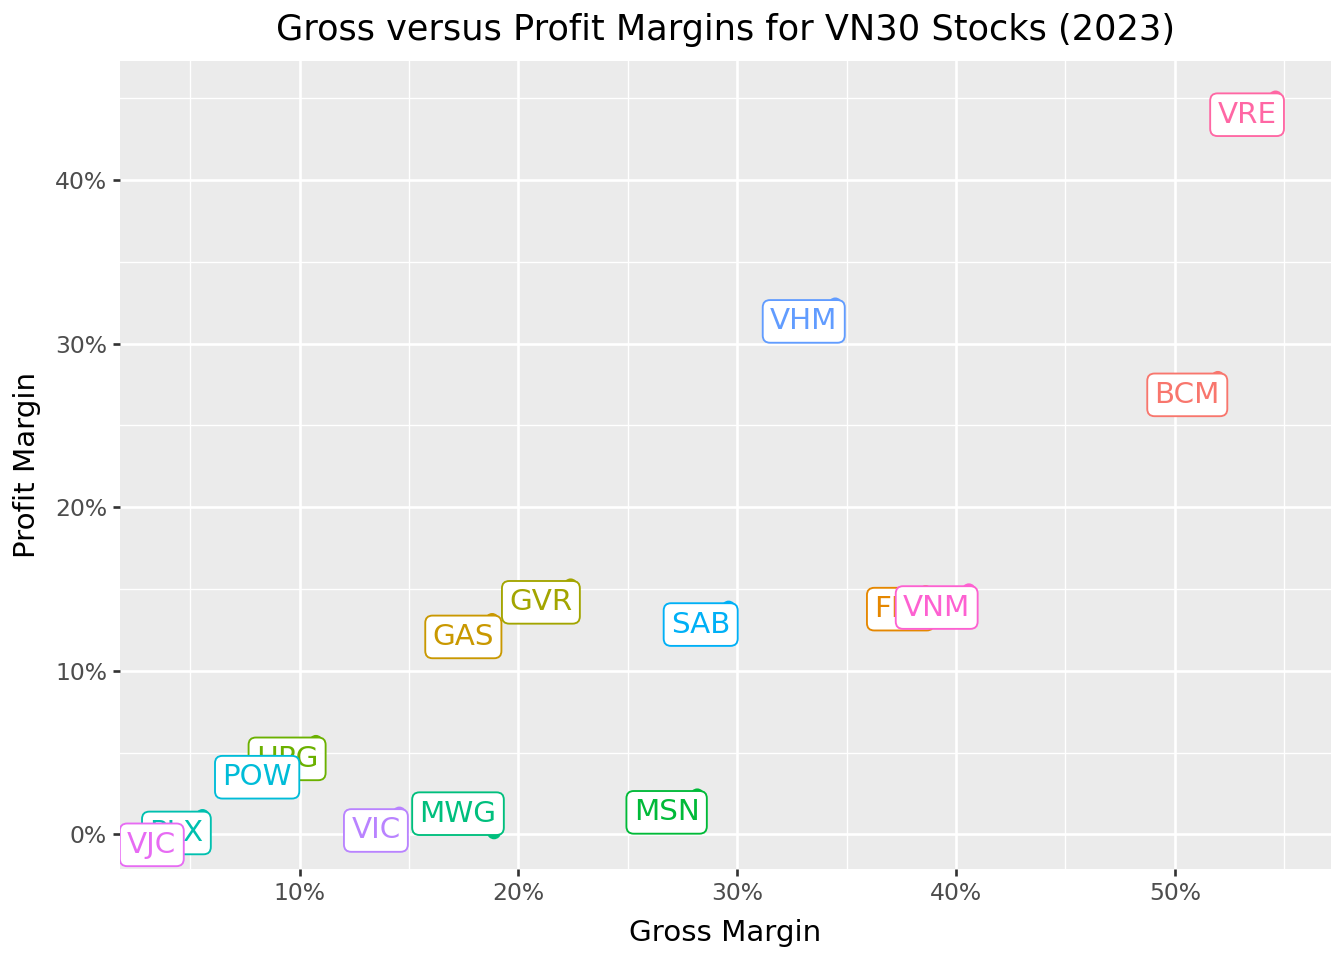

In [17]:
#| label: fig-414
#| fig-cap: Comparing gross and profit margins reveals how much of gross profit survives operating expenses, interest, and taxes. Companies far below the diagonal have high overhead relative to gross profit.
#| fig-alt: 'Title: Gross versus profit margins for VN30 stocks. The figure shows a scatter plot with gross margins on the horizontal axis and profit margins on the vertical axis.'

profit_margins = combined_statements.query("year == 2023")

profit_margins_figure = (
    ggplot(
        profit_margins,
        aes(x="gross_margin", y="profit_margin", color="label")
    )
    + geom_point(size=2)
    + geom_label(
        aes(label="label"),
        adjust_text={"arrowprops": {"arrowstyle": "-"}}
    )
    + scale_x_continuous(labels=percent_format())
    + scale_y_continuous(labels=percent_format())
    + labs(
        x="Gross Margin", y="Profit Margin",
        title="Gross versus Profit Margins for VN30 Stocks (2023)"
    )
    + theme(legend_position="none")
)

profit_margins_figure.show()

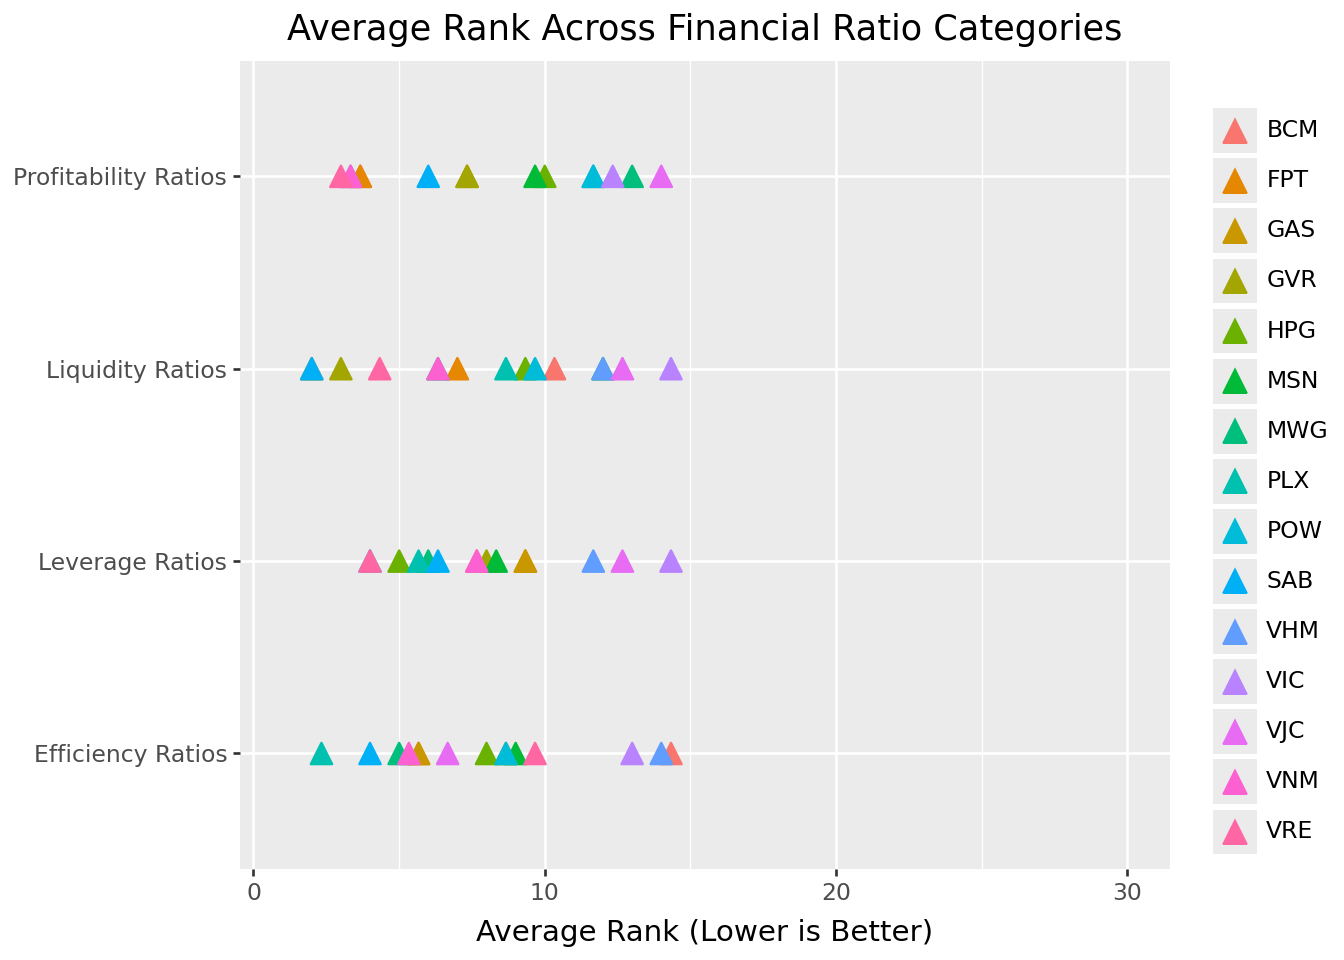

In [18]:
#| label: fig-415
#| fig-cap: Ranking companies across multiple ratio categories reveals overall financial profiles. Companies with consistently low ranks across categories demonstrate broad-based financial strength.
#| fig-alt: 'Title: Average rank in financial ratio categories. The figure shows a scatter plot with ranks for companies across liquidity, leverage, efficiency, and profitability categories.'

financial_ratios = (combined_statements
    .query("year == 2023")
    .filter(
        items=["symbol"] + [
            col for col in combined_statements.columns
            if any(x in col for x in [
                "ratio", "margin", "roe", "_to_", "turnover", "interest_coverage"
            ])
        ]
    )
    .melt(id_vars=["symbol"], var_name="name", value_name="value")
    .assign(
        type=lambda x: np.select(
            [
                x["name"].isin(["current_ratio", "quick_ratio", "cash_ratio"]),
                x["name"].isin(["debt_to_equity", "debt_to_asset", "interest_coverage"]),
                x["name"].isin(["asset_turnover", "inventory_turnover", "receivables_turnover"]),
                x["name"].isin(["gross_margin", "profit_margin", "after_tax_roe"]),
            ],
            [
                "Liquidity Ratios",
                "Leverage Ratios",
                "Efficiency Ratios",
                "Profitability Ratios"
            ],
            default="Other"
        )
    )
)

financial_ratios["rank"] = (financial_ratios
    .sort_values(["type", "name", "value"], ascending=[True, True, False])
    .groupby(["type", "name"])
    .cumcount() + 1
)

final_ranks = (financial_ratios
    .groupby(["symbol", "type"], as_index=False)
    .agg(rank=("rank", "mean"))
    .query("symbol in @vn30_symbols")
)

final_ranks_figure = (
    ggplot(final_ranks, aes(x="rank", y="type", color="symbol"))
    + geom_point(shape="^", size=4)
    + labs(
        x="Average Rank (Lower is Better)", y="", color="",
        title="Average Rank Across Financial Ratio Categories"
    )
    + coord_cartesian(xlim=[1, 30])
)

final_ranks_figure.show()

In [19]:
prices_monthly = pd.read_sql_query(
    sql="SELECT * FROM prices_monthly",
    con=tidy_finance,
    parse_dates={"datadate"}
)

# Use December prices for annual calculations
prices_december = (prices_monthly
    .assign(date=lambda x: pd.to_datetime(x["date"]))
    .query("date.dt.month == 12")
)

In [20]:
combined_statements_ff = (combined_statements
    .query("year == 2023")
    .merge(prices_december, on=["symbol", "year"], how="left")
    .merge(
        (balance_sheet_statements
            .query("year == 2022")
            .get(["symbol", "total_asset"])
            .rename(columns={"total_asset": "total_assets_lag"})
        ),
        on="symbol",
        how="left"
    )
    .assign(
        size=lambda x: np.log(x["mktcap"]),
        book_to_market=lambda x: x["total_equity"] / x["mktcap"],
        operating_profitability=lambda x: (
            (x["is_revenue"] - x["is_cogs"] -
             x["selling_general_and_administrative_expenses"] -
             x["is_interest_expense"]) / x["total_equity"]
        ),
        investment=lambda x: x["total_asset"] / x["total_assets_lag"] - 1
    )
)

combined_statements_ff.head(3)

,symbol,year,label,current_ratio,quick_ratio,cash_ratio,debt_to_equity,debt_to_asset,total_asset,total_equity,...,shrout,mktcap,mktcap_lag,risk_free,ret_excess,total_assets_lag,size,book_to_market,operating_profitability,investment
0,POW,2023,POW,1.084255,1.084255,0.315089,0.0,0.0,7.036209e+13,3.411943e+13,...,2.341872e+09,26346.055367,26346.055367,0.003333,-0.003333,5.684324e+13,10.179074,1.295049e+09,0.025539,0.237827
1,HPG,2023,HPG,1.156655,1.156655,0.171324,0.0,0.0,1.877826e+14,1.028364e+14,...,5.814786e+09,162523.260217,154382.560242,0.003333,-0.003333,1.703355e+14,11.998576,6.327489e+08,0.072798,0.102428
2,MWG,2023,MWG,1.688604,1.688604,0.174408,0.0,0.0,6.011124e+13,2.335956e+13,...,1.462941e+09,62613.896064,56323.247628,0.003333,-0.009141,5.583410e+13,11.044743,3.730731e+08,-0.002443,0.076604


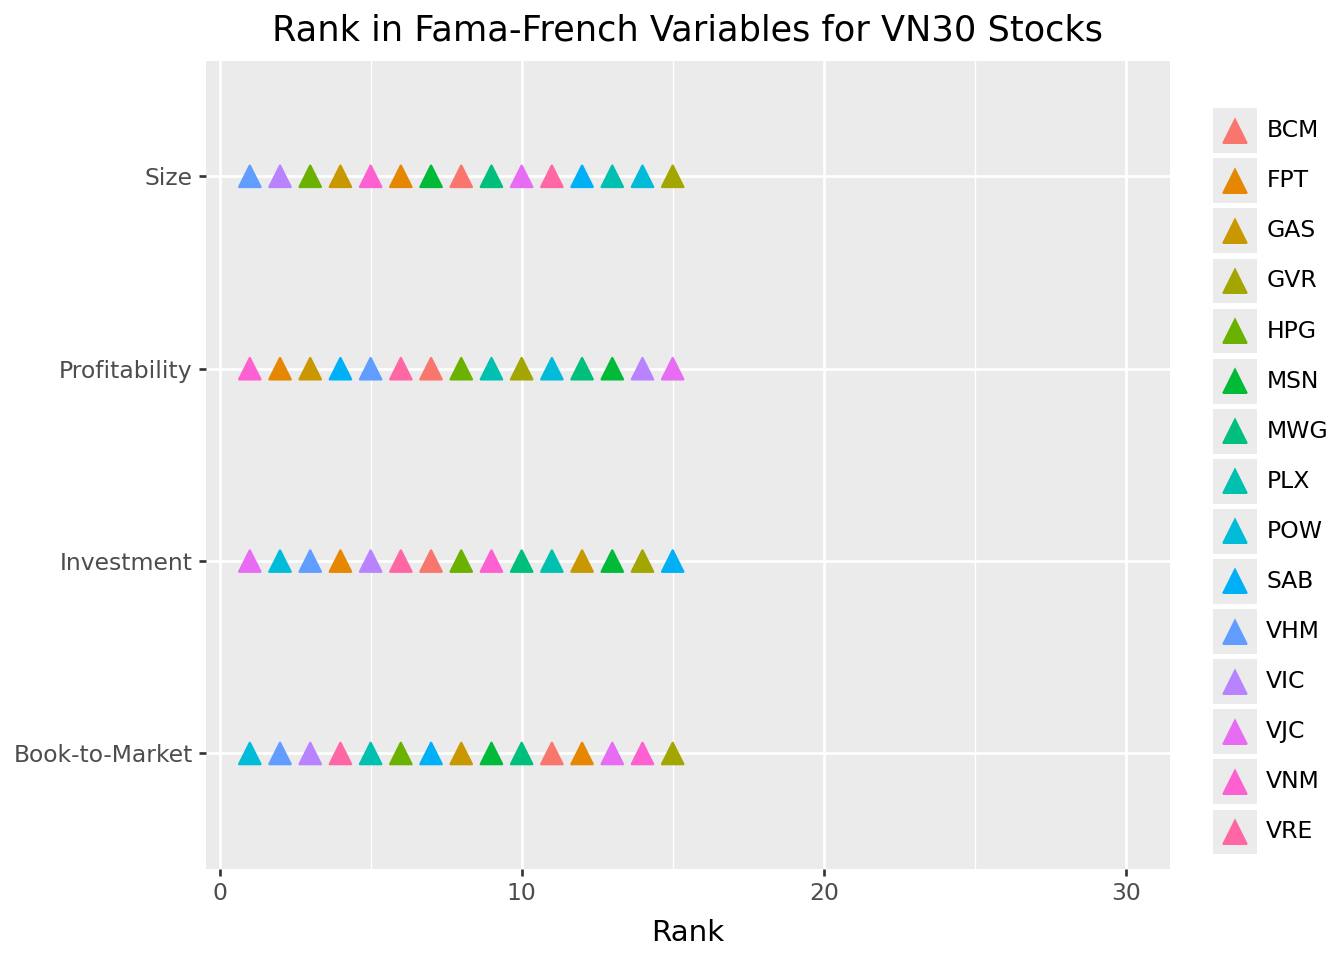

In [21]:
#| label: fig-416
#| fig-cap: Rankings on Fama-French variables connect financial statement analysis to asset pricing. According to factor models, smaller, higher book-to-market, more profitable, and lower-investment firms should earn higher expected returns.
#| fig-alt: 'Title: Rank in Fama-French variables for VN30 stocks. The figure shows a scatter plot with company ranks for size, book-to-market, profitability, and investment factors.'

factors_ranks = (combined_statements_ff
    .get(["symbol", "size", "book_to_market", "operating_profitability", "investment"])
    .rename(columns={
        "size": "Size",
        "book_to_market": "Book-to-Market",
        "operating_profitability": "Profitability",
        "investment": "Investment"
    })
    .melt(id_vars=["symbol"], var_name="name", value_name="value")
    .assign(
        rank=lambda x: (
            x.sort_values(["name", "value"], ascending=[True, False])
            .groupby("name")
            .cumcount() + 1
        )
    )
    .query("symbol in @vn30_symbols")
)

factors_ranks_figure = (
    ggplot(factors_ranks, aes(x="rank", y="name", color="symbol"))
    + geom_point(shape="^", size=4)
    + labs(
        x="Rank", y="", color="",
        title="Rank in Fama-French Variables for VN30 Stocks"
    )
    + coord_cartesian(xlim=[1, 30])
)

factors_ranks_figure.show()